In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost 
import lightgbm as ltb
from lightgbm import LGBMClassifier



from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")
print(df.shape)
df.head()

(10000, 14)


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df = df.drop(columns=["stab"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [5]:
df["stabf"] = df["stabf"].replace({"stable":0, "unstable":1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1015.8 KB


In [13]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.638000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.480603
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,0.000000
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,0.000000
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,1.000000
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,1.000000
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,1.000000


In [15]:
X = df.drop(columns= 'stabf')
y = df['stabf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.value_counts()

(8000, 12) (2000, 12) (8000,) (2000,)


1    5092
0    2908
Name: stabf, dtype: int64

In [16]:
smote = SMOTE(random_state= 1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_train_balanced.shape, y_train_balanced.shape

((10184, 12), (10184,))

In [17]:
y_train_balanced.value_counts()

1    5092
0    5092
Name: stabf, dtype: int64

In [18]:
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(X_train_balanced)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=X_train_balanced.columns)
normalised_train_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.605895,0.214898,0.686826,0.945002,0.454782,0.516700,0.874552,0.255448,0.545528,0.598331,0.669360,0.642234
1,0.481097,0.525305,0.797470,0.027436,0.616162,0.479547,0.065178,0.641255,0.414248,0.049680,0.912824,0.083403
2,0.075724,0.874245,0.355155,0.835240,0.474432,0.640493,0.697645,0.252484,0.903588,0.919622,0.198830,0.642306
3,0.736693,0.652439,0.873580,0.171161,0.362461,0.278625,0.940452,0.691134,0.221930,0.893734,0.963154,0.579607
4,0.692014,0.088023,0.589553,0.764197,0.220544,0.718310,0.911640,0.685474,0.983833,0.701163,0.828559,0.121206


In [19]:
normalised_test_df = scaler.transform(X_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns=X_test.columns)
normalised_test_df.tail(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
1997,0.773597,0.019302,0.023944,0.652999,0.237538,0.957730,0.526629,0.782590,0.142234,0.536636,0.665863,0.881011
1998,0.176148,0.555478,0.431308,0.621034,0.300516,0.712074,0.508036,0.867006,0.939725,0.729610,0.107517,0.268611
1999,0.101785,0.935851,0.581024,0.934445,0.621186,0.069982,0.273930,0.827655,0.641638,0.234936,0.501312,0.843387


In [27]:
rfc = RandomForestClassifier(random_state=1)
tree = ExtraTreesClassifier(random_state=1)
Xgb = xgboost.XGBRFClassifier(random_state=1)
Ltb =LGBMClassifier(random_state=1)

In [21]:
rfc.fit(normalised_train_df, y_train_balanced)
y_pred = rfc.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(round(accuracy, 4))

0.918


In [22]:
Xgb.fit(normalised_train_df, y_train_balanced)
y_pred = Xgb.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(round(accuracy, 4))

0.8725


In [23]:
Ltb.fit(normalised_train_df, y_train_balanced)
y_pred = Ltb.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(round(accuracy, 4))

0.93


In [30]:
tree.fit(normalised_train_df, y_train_balanced)
y_pred = tree.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(round(accuracy, 5))

0.919


In [40]:
search = dict(n_estimators = [100, 300, 500, 1000], min_samples_split = [2, 5, 7], min_samples_leaf = [4, 6, 8], max_features = ["sqrt", "log2", "auto"])
random_cv = RandomizedSearchCV(estimator=tree, param_distributions=search, n_iter=10, cv=5, scoring="accuracy", n_jobs=-1, verbose=1, random_state=1)

clf = random_cv.fit(normalised_train_df, y_train_balanced)
random_cv.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'log2'}

In [41]:
y_pred = random_cv.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(round(accuracy, 4))

0.918


In [42]:
tree_1 = ExtraTreesClassifier(n_estimators= 1000, min_samples_split= 5, min_samples_leaf = 6, max_features = 'log2')
tree_1.fit(normalised_train_df, y_train_balanced)

y_pred_1 = tree_1.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_1)
print(round(accuracy, 4))

0.9175


In [43]:
features = normalised_train_df.columns
importances = tree_1.feature_importances_
importances

array([0.138104  , 0.13608011, 0.13161435, 0.1360817 , 0.01069272,
       0.013527  , 0.01334392, 0.01364358, 0.09416835, 0.10289424,
       0.11058363, 0.0992664 ])

<AxesSubplot:>

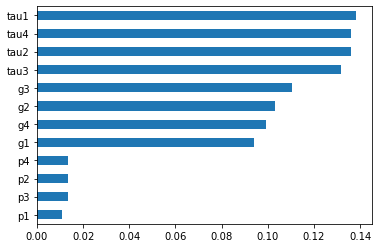

In [45]:
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.plot(kind = "barh")